<a href="https://colab.research.google.com/github/EmanSalah2000/SocialNetworkAds/blob/main/socailnetworkads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. import libraries**

In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


from sklearn.model_selection import cross_val_score,KFold


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression


from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# **2. read data**

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

# **3. prepare  and analysis the data**

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
print(np.min(data['Age']))
print(np.max(data['Age']))
print(np.min(data['EstimatedSalary']))
print(np.max(data['EstimatedSalary']))

18
60
15000
150000


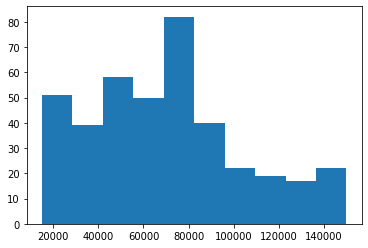

In [6]:
plt.hist(data['EstimatedSalary'])
plt.show()

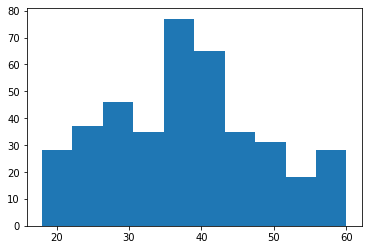

In [7]:
plt.hist(data['Age'])
plt.show()

In [8]:
data['Gender']=data['Gender'].map({'Male': 1, 'Female': 0})
data['EstimatedSalary'] = (data['EstimatedSalary'] - data['EstimatedSalary'].mean()) / data['EstimatedSalary'].std() 
data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std() 

In [9]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,-1.779569,-1.488183,0
1,15810944,1,-0.253270,-1.458854,0
2,15668575,0,-1.111813,-0.784307,0
3,15603246,0,-1.016419,-0.373714,0
4,15804002,1,-1.779569,0.183521,0


In [10]:
# schuffle the data
data=data.sample(frac=1)

In [11]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
225,15622171,1,-0.062483,-0.491026,0
5,15728773,1,-1.016419,-0.344386,0
282,15750447,1,-0.062483,0.007552,1
300,15736397,0,1.940784,-0.930948,1
214,15622478,1,0.891454,-0.784307,0


In [12]:
data_set = data[['Age', 'Gender', 'EstimatedSalary','Purchased']].copy()


In [13]:
print(len(data_set))


400


# **4. analysis data**
1. check missing values
2. check outliers 
3. check duplicates in data

In [14]:
data_set.isnull().sum()

Age                0
Gender             0
EstimatedSalary    0
Purchased          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


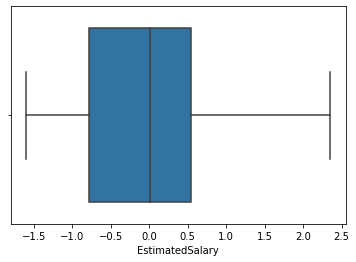

In [15]:
sns.boxplot(data_set['EstimatedSalary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


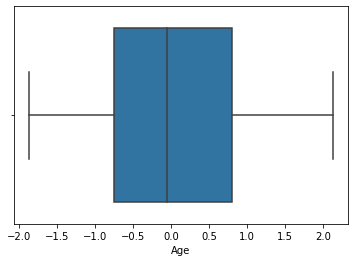

In [16]:
sns.boxplot(data_set['Age'])

In [17]:
data_set.duplicated().sum()

20

In [18]:
data_set[data_set.duplicated()]

,Age,Gender,EstimatedSalary,Purchased
381,0.986847,1,-1.077589,1
81,0.128304,1,-0.813636,0
257,0.223698,1,-0.373714,0
309,0.032911,0,-0.579011,0
341,-0.253270,1,0.154193,0
115,0.223698,1,-0.373714,0
374,-0.062483,0,0.300833,0
74,-0.539451,1,-1.517511,0
126,0.414485,1,-0.139089,0
52,-0.825632,0,0.388818,0


In [19]:
data_set=data_set.drop_duplicates()

In [20]:
data_set.duplicated().sum()

0

In [21]:
data_set[data_set.duplicated()]

,Age,Gender,EstimatedSalary,Purchased


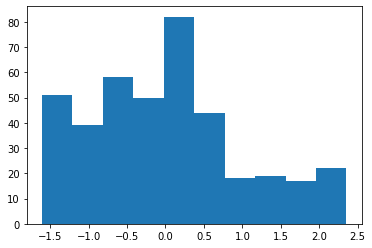

In [22]:
plt.hist(data['EstimatedSalary'])
plt.show()

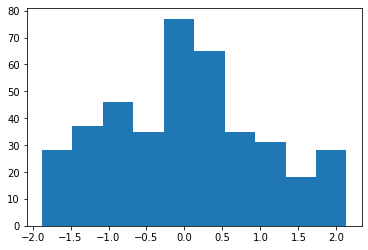

In [23]:
plt.hist(data['Age'])
plt.show()

# **5. split data to train valdiation test**

In [24]:
data_x=data_set[['Age','Gender', 'EstimatedSalary']].copy()
data_y=data_set[['Purchased']].copy()

In [25]:
split_train=int(len(data_set)*(70/100))
split_vald=int(len(data_set)*(20/100))
split_test=int(len(data_set)*(10/100))

In [26]:
x_train=data_x.iloc[:split_train,:]
x_vald=data_x.iloc[split_train:split_train+split_vald,:]
x_test=data_x.iloc[split_train+split_vald:,:]

y_train=data_y.iloc[:split_train,:]
y_vald=data_y.iloc[split_train:split_train+split_vald,:]
y_test=data_y.iloc[split_train+split_vald:,:]


In [27]:
print(len(x_train))
print(len(x_vald))
print(len(x_test))

print(len(y_train))
print(len(y_vald))
print(len(y_test))

266
76
38
266
76
38


# **6. the model**
1. naive bayes 
2. svm 
3. logistic regression
4. cross-valdiation naive bayes 
5. cross-valdation  svm
6. cross-valdation  logistic regression
7. neural network 


In [28]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_vald)
print("valdation accuarcy is :", accuracy_score(y_vald, y_pred, normalize=True))

y_pred = gnb.predict(x_test)
print("testing accuarcy is :", accuracy_score(y_test, y_pred, normalize=True))

y_pred = gnb.fit(x_train, y_train).predict(x_train)
print("training accuarcy is :",accuracy_score(y_train, y_pred, normalize=True))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


valdation accuarcy is : 0.8947368421052632
testing accuarcy is : 0.8421052631578947
training accuarcy is : 0.8947368421052632


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
clf = svm.SVC()
y_pred = clf.fit(x_train, y_train).predict(x_vald)
print("valdation accuarcy is :", accuracy_score(y_vald, y_pred, normalize=True))

y_pred = clf.predict(x_test)
print("testing accuarcy is :", accuracy_score(y_test, y_pred, normalize=True))

y_pred = clf.fit(x_train, y_train).predict(x_train)
print("training accuarcy is :",accuracy_score(y_train, y_pred, normalize=True))

valdation accuarcy is : 0.9078947368421053
testing accuarcy is : 0.8947368421052632
training accuarcy is : 0.9022556390977443


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
log = LogisticRegression(random_state=42)
y_pred = log.fit(x_train, y_train).predict(x_vald)
print("valdation accuarcy is :", accuracy_score(y_vald, y_pred, normalize=True))

y_pred = log.predict(x_test)
print("testing accuarcy is :", accuracy_score(y_test, y_pred, normalize=True))

y_pred = log.fit(x_train, y_train).predict(x_train)
print("training accuarcy is :",accuracy_score(y_train, y_pred, normalize=True))

valdation accuarcy is : 0.8421052631578947
testing accuarcy is : 0.7368421052631579
training accuarcy is : 0.8533834586466166


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**try cross valdation**

In [31]:
gnb=GaussianNB()
kf=KFold(n_splits=5)
score=cross_val_score(gnb,data_x,data_y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Scores are [0.85526316 0.92105263 0.88157895 0.92105263 0.84210526]
Average Cross Validation score :0.8842105263157893


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
clf=svm.SVC()
kf=KFold(n_splits=5)
score=cross_val_score(clf,data_x,data_y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross Validation Scores are [0.88157895 0.93421053 0.88157895 0.92105263 0.89473684]
Average Cross Validation score :0.9026315789473685


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,data_x,data_y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Scores are [0.85526316 0.88157895 0.81578947 0.88157895 0.77631579]
Average Cross Validation score :0.8421052631578947


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**try neural network**

In [34]:
y_train=np.array(y_train)
enc=OneHotEncoder()
y_train=pd.DataFrame(enc.fit_transform(y_train).toarray())


y_vald=np.array(y_vald)
enc=OneHotEncoder()
y_vald=pd.DataFrame(enc.fit_transform(y_vald).toarray())


y_test=np.array(y_test)
enc=OneHotEncoder()
y_test=pd.DataFrame(enc.fit_transform(y_test).toarray())

In [35]:
x_train.iloc[0].shape

(3,)

In [36]:
model = Sequential()

model.add(Dense(3,input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer = 'adam',loss='binary_crossentropy', metrics =['accuracy'])
model.fit(x_train, y_train, validation_data=(x_vald, y_vald),epochs =150 ,batch_size=2)

Epoch 1/150
133/133 [==============================] - 2s 8ms/step - loss: 0.7166 - accuracy: 0.6391 - val_loss: 0.6795 - val_accuracy: 0.7368
Epoch 2/150
133/133 [==============================] - 1s 5ms/step - loss: 0.6896 - accuracy: 0.6955 - val_loss: 0.6579 - val_accuracy: 0.7500
Epoch 3/150
133/133 [==============================] - 1s 5ms/step - loss: 0.6586 - accuracy: 0.7368 - val_loss: 0.6284 - val_accuracy: 0.7895
Epoch 4/150
133/133 [==============================] - 1s 6ms/step - loss: 0.6143 - accuracy: 0.7444 - val_loss: 0.5838 - val_accuracy: 0.8026
Epoch 5/150
133/133 [==============================] - 1s 6ms/step - loss: 0.5559 - accuracy: 0.7895 - val_loss: 0.5330 - val_accuracy: 0.8158
Epoch 6/150
133/133 [==============================] - 1s 5ms/step - loss: 0.4799 - accuracy: 0.8308 - val_loss: 0.4771 - val_accuracy: 0.8289
Epoch 7/150
133/133 [==============================] - 1s 5ms/step - loss: 0.4139 - accuracy: 0.8534 - val_loss: 0.4419 - val_accuracy: 0.8421

In [37]:
y_pred=model.predict(x_train)
y_pred = (y_pred > 0.5) 
print(accuracy_score(y_train, y_pred, normalize=True))

9/9 [==============================] - 0s 2ms/step
0.9060150375939849


In [38]:
y_pred=model.predict(x_vald)
y_pred = (y_pred > 0.5) 
print(accuracy_score(y_vald, y_pred, normalize=True))

3/3 [==============================] - 0s 4ms/step
0.8947368421052632


In [39]:
y_pred=model.predict(x_test)
y_pred = (y_pred > 0.5) 
print(accuracy_score(y_test, y_pred, normalize=True))

2/2 [==============================] - 0s 4ms/step
0.868421052631579
